___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
x_train[:5].shape

(5, 28, 28)

In [6]:
x_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

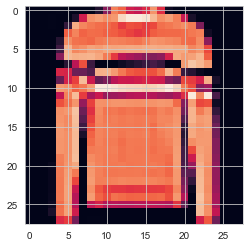

In [7]:
plt.imshow(x_train[5])

In [8]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [9]:
y_train.shape

(60000,)

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [12]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [13]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [14]:
y_train[0]

9

In [15]:
classes[y_train[0]]

'Ankle boot'

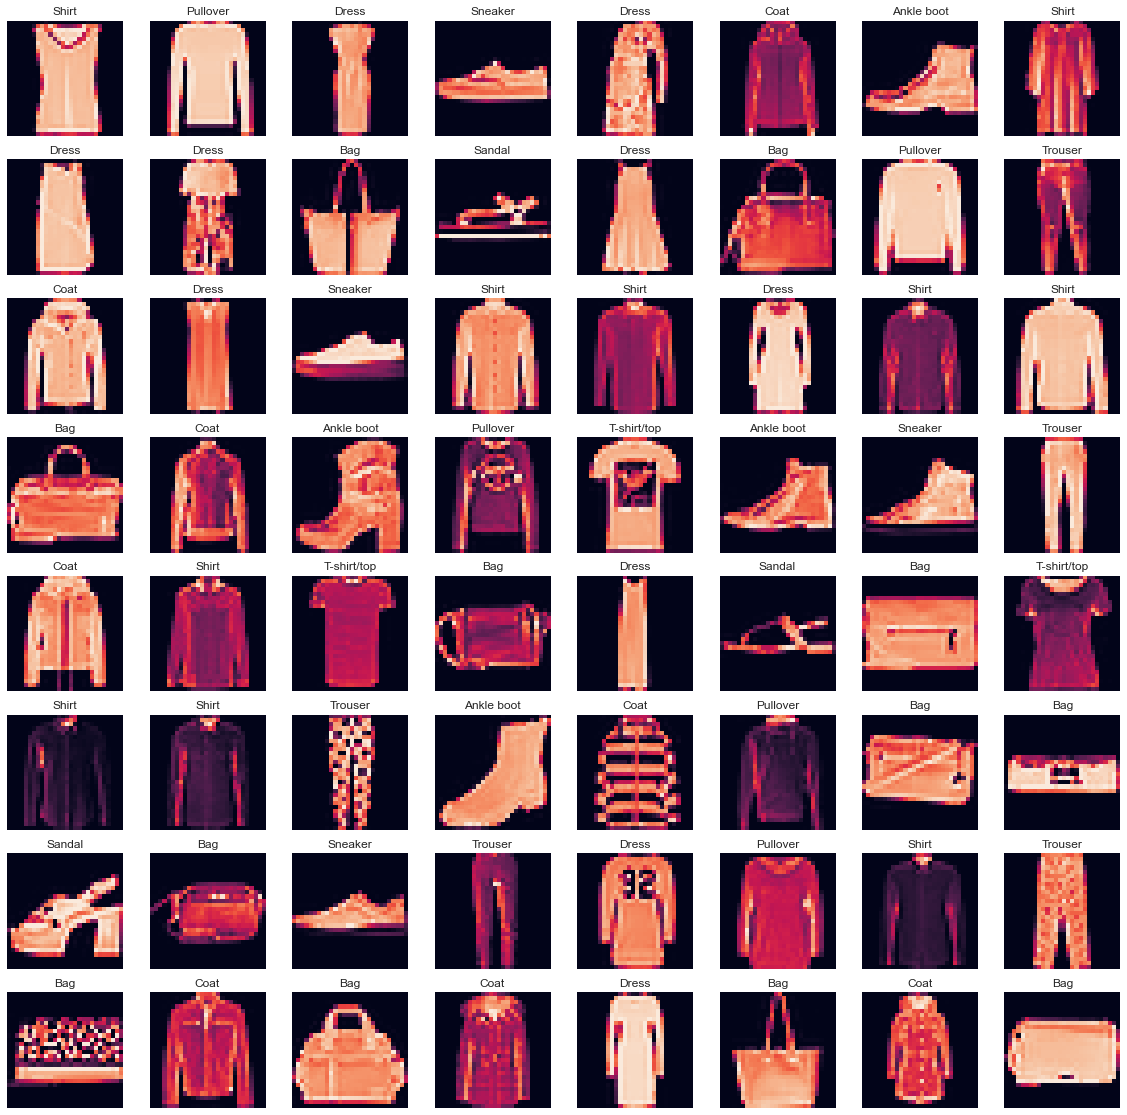

In [16]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [17]:
x_train[5].min()

0

In [18]:
x_train[5].max()

255

In [19]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [20]:
x_train[10].min()

0.0

In [21]:
x_train[10].max()

1.0

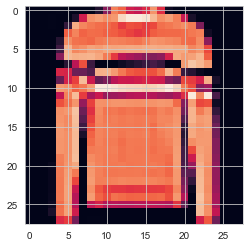

In [22]:
plt.imshow(x_train[5])

In [23]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [24]:
x_train=x_train.reshape((60000,14,14,4))

In [25]:
x_train.shape

(60000, 14, 14, 4)

In [26]:
x_test=x_test.reshape((10000,14,14,4))

In [27]:
x_test.shape

(10000, 14, 14, 4)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [29]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [32]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [34]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(14,14,4), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 28)        1036      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [38]:
model.fit(x_train, Y_train, batch_size=32, epochs=5, validation_data=(x_test,Y_test),callbacks=[early_stop])

Epoch 1/5
1875/1875 [==============================] - 43s 22ms/step - loss: 0.4374 - accuracy: 0.8410 - val_loss: 0.3517 - val_accuracy: 0.8690
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3018 - accuracy: 0.8893 - val_loss: 0.3356 - val_accuracy: 0.8798
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2690 - accuracy: 0.9020 - val_loss: 0.3458 - val_accuracy: 0.8818
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2476 - accuracy: 0.9119 - val_loss: 0.3459 - val_accuracy: 0.8913


**TASK 7: Plot values of metrics you used in your model.**

In [39]:
model.metrics_names

['loss', 'accuracy']

In [40]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.437,0.841,0.352,0.869
1,0.302,0.889,0.336,0.880
2,0.269,0.902,0.346,0.882
3,0.248,0.912,0.346,0.891


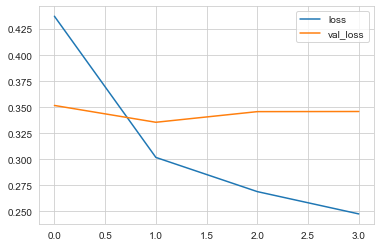

In [41]:
summary[["loss","val_loss"]].plot();

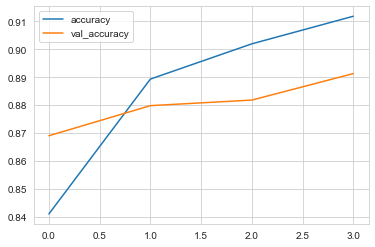

In [42]:
summary[["accuracy","val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
model.evaluate(x_test,Y_test) 

313/313 [==============================] - 1s 3ms/step - loss: 0.3356 - accuracy: 0.8798


[0.33557742834091187, 0.879800021648407]

In [45]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.33557742834091187
Test accuracy: 0.879800021648407


## Prediction

In [46]:
pred_prob = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [47]:
y_pred = np.argmax(pred_prob, axis=1)

In [48]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [49]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.90      0.87      0.89      1000
           4       0.82      0.73      0.77      1000
           5       0.98      0.97      0.97      1000
           6       0.62      0.78      0.69      1000
           7       0.93      0.98      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



In [51]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [52]:
print(confusion_matrix(y_test,y_pred))

[[774   1  14  14   3   2 184   0   8   0]
 [  2 964   1  19   6   0   6   0   2   0]
 [ 10   0 819   8  69   0  92   1   1   0]
 [ 22   3  10 867  42   0  54   0   2   0]
 [  1   0 112  31 732   1 121   0   2   0]
 [  0   0   0   0   0 967   0  26   0   7]
 [ 71   3  81  18  35   0 778   0  14   0]
 [  0   0   0   0   0   7   0 980   0  13]
 [  1   1   4   2   3   3  11   4 971   0]
 [  0   0   0   0   0   6   1  47   0 946]]


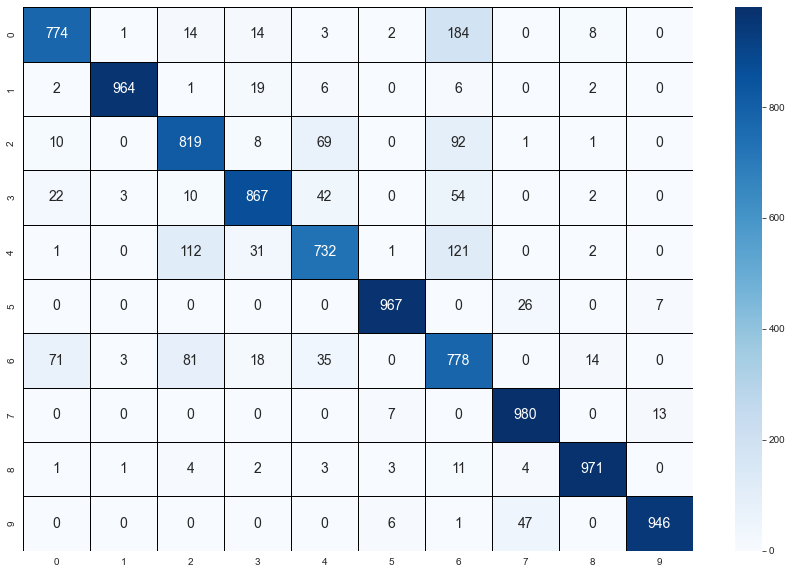

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14});

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___